In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
# Create a new folder
os.mkdir('/content/gdrive/My Drive/CreditCardFraud')

In [ ]:
!pip install opendatasets
!pip install pandas-profiling
!pip install wandb
!pip install pyarrow
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=19aa615a8b0d1c0d8ef869ed26c3522fcc2791d96ce0ca5c446ac4a48a253a60
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.

In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"
data = od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ace991
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:02<00:00, 23.3MB/s]


In [ ]:
import shutil
import os
source_folder_path = '/content/creditcardfraud'
destination_folder = '/content/gdrive/My Drive/CreditCardFraud'

shutil.copytree(source_folder_path, os.path.join(destination_folder, os.path.basename(source_folder_path)))

print("Directory copied to Google Drive successfully!")

Directory copied to Google Drive successfully!


In [ ]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CreditCardFraud/creditcardfraud/creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
224495,143824.0,2.110971,-0.034282,-1.344294,0.249597,0.235693,-0.806926,0.202894,-0.318182,0.515904,0.060071,-1.277018,0.466858,0.667019,0.138101,0.037690,0.073756,-0.566825,-0.703261,0.403270,-0.170764,-0.329050,-0.786985,0.248843,-0.641532,-0.189921,0.237155,-0.068523,-0.065878,1.98,0
232373,147145.0,-0.732740,1.294901,2.734779,3.165641,0.152697,0.950632,0.269641,0.391141,-1.706112,0.793648,0.247797,-0.203980,-0.432138,-0.053151,-1.010943,0.987496,-0.787125,0.867485,-0.627719,-0.027147,0.289844,0.818566,-0.465148,0.069190,0.441667,0.326898,0.061744,0.067195,9.85,0
186920,127310.0,-1.418459,0.878459,0.516860,-0.984216,1.267448,1.631006,0.394978,0.915696,-0.974067,-0.988703,1.205550,0.854146,-0.019191,0.759204,0.472009,-0.938404,0.516246,-1.300118,-1.437223,-0.282439,0.497352,1.400247,-0.521127,-1.669730,0.712737,0.823859,-0.220548,-0.065671,29.00,0
67522,52578.0,-0.904422,-0.120869,0.509205,-2.924123,0.616929,-0.298202,0.558176,0.033224,1.204781,-1.514513,-1.294847,0.171289,0.455761,-0.123756,1.365315,0.088860,-0.872420,-0.091841,-0.090604,0.022891,-0.106003,-0.150921,-0.002709,-1.303988,0.209410,-0.223877,0.168168,0.104194,69.55,0
49262,43981.0,0.349629,-2.141724,-0.134627,-1.254407,-1.176471,0.245024,-0.092552,0.017835,1.628973,-1.241618,0.359504,1.282688,0.624555,-0.051687,0.740942,0.192349,-0.757533,0.990392,1.311453,1.000522,0.261237,-0.144057,-0.615133,-0.750746,0.319848,-0.026254,-0.050774,0.091251,500.00,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

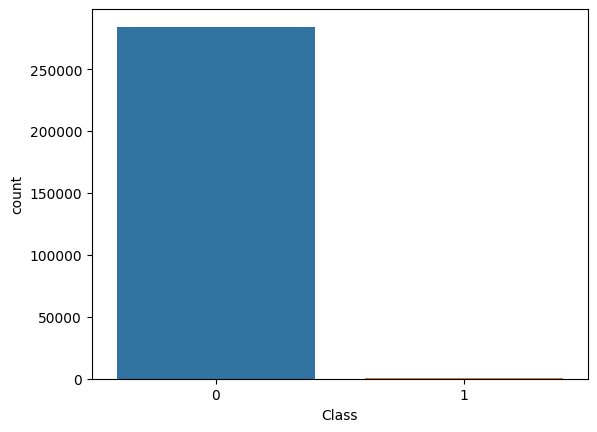

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x='Class')

In [ ]:
print(df['Amount'].median())
print(df['Amount'].mean())

22.0
88.34961925093133


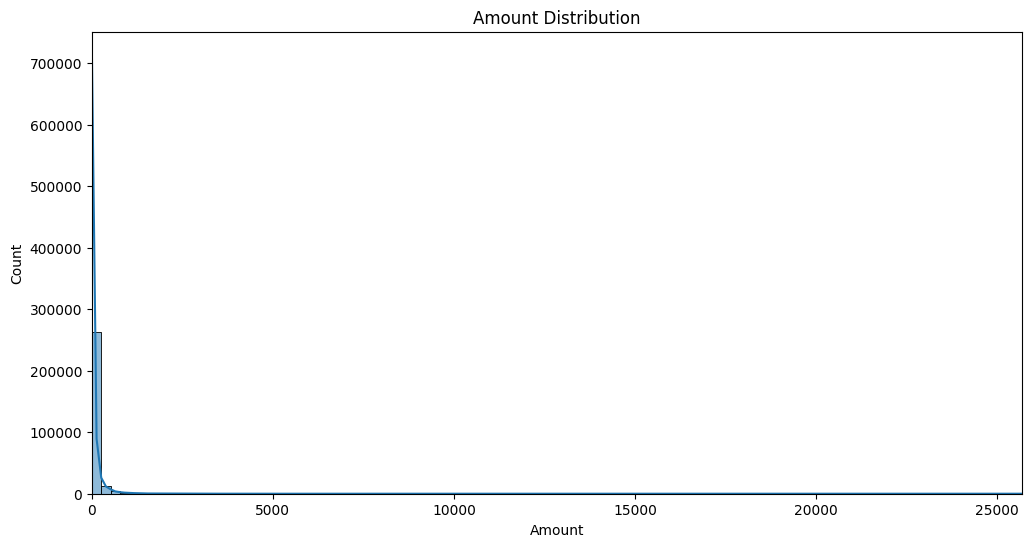

In [ ]:
amount_val = df['Amount'].values
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Amount', kde=True,bins=100)
plt.xlim([min(amount_val), max(amount_val)])
plt.xlabel('Amount')
plt.title('Amount Distribution')
plt.show()

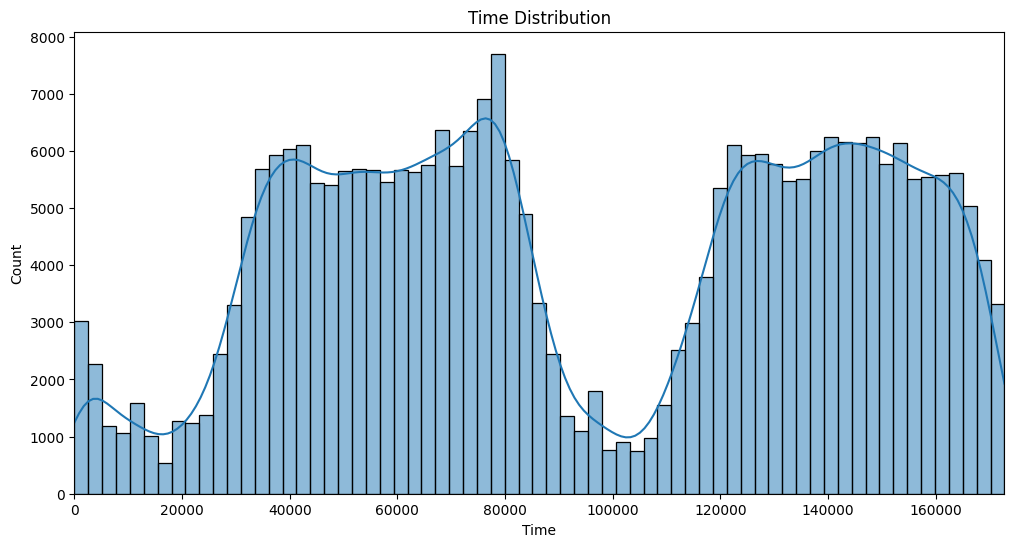

In [ ]:
time = df['Time'].values
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Time', kde=True)
plt.xlim([min(time), max(time)])
plt.xlabel('Time')
plt.title('Time Distribution')
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y,shuffle=True)

In [ ]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
def evaluate_with_smote(X_train, y_train):
    print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))

    # List to append the score and then find the average
    accuracy_lst = []
    precision_lst = []
    recall_lst = []
    f1_lst = []
    auc_lst = []

    log_reg_params = {"solver":['liblinear','saga'],"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

    # Implementing SMOTE Technique
    # Cross Validating the right way
    # Parameters
    sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    for train, test in sss.split(X_train, y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
        pipeline.fit(X_train.iloc[train], y_train.iloc[train])
        best_est = pipeline.named_steps['randomizedsearchcv'].best_estimator_
        prediction = best_est.predict(X_train.iloc[test])

        accuracy_lst.append(best_est.score(X_train.iloc[test], y_train.iloc[test]))
        precision_lst.append(precision_score(y_train.iloc[test], prediction))
        recall_lst.append(recall_score(y_train.iloc[test], prediction))
        f1_lst.append(f1_score(y_train.iloc[test], prediction))
        auc_lst.append(roc_auc_score(y_train.iloc[test], prediction))

    print('---' * 45)
    print('')
    print("accuracy: {}".format(np.mean(accuracy_lst)))
    print("precision: {}".format(np.mean(precision_lst)))
    print("recall: {}".format(np.mean(recall_lst)))
    print("f1: {}".format(np.mean(f1_lst)))
    print('---' * 45)
    return best_est

In [ ]:
best_est=evaluate_with_smote(X_train, y_train)



Length of X (train): 199364 | Length of y (train): 199364
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9776639950271084
precision: 0.06779540701809733
recall: 0.9243393009377664
f1: 0.12621973780628223
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(X_test)
print(classification_report(y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     85295
       Fraud       0.08      0.86      0.14       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443

